In [47]:
import pandas as pd
import os
import requests
from io import BytesIO
from PIL import Image
from concurrent import futures

In [4]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Traffic/traffic_2019.csv', index_col = 0)
df_2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,3702,1.338310,103.980320,480,640,a4b73caa57b8cc0d35dd7c12e9e7ce82
1,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,39bf0b228e857fdd02e6eea7e8796604
2,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1703,1.328147,103.862203,480,640,db2e6d73cceb5833dbd193fbabb449eb
3,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,4707,1.333446,103.652701,480,640,aae1fd30304c297e653fbc71c98e3d96
4,2018-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,2705,1.367286,103.779470,480,640,4cdb7e6b802a5757fbfc77951fbbdfb4
...,...,...,...,...,...,...,...,...
1388572,2019-01-31T23:59:47+08:00,https://images.data.gov.sg/api/traffic-images/...,4714,1.310230,103.764380,480,640,1ae54dedfcdea753048e44a3b43ebbbf
1388573,2019-01-31T23:59:47+08:00,https://images.data.gov.sg/api/traffic-images/...,4716,1.322270,103.674530,480,640,9f47b554f8694bf72a45a65ebde78467
1388574,2019-01-31T23:59:47+08:00,https://images.data.gov.sg/api/traffic-images/...,4798,1.260000,103.823611,480,640,480a36203e06b7f43b9ac03e8c74fd01
1388575,2019-01-31T23:59:47+08:00,https://images.data.gov.sg/api/traffic-images/...,5794,1.330969,103.916862,480,640,a4fa0cb9dec813f42301e9a308edfb28


In [5]:
df_2019 = df_2019[df_2019['camera_id'] == 1709]
df_2019.reset_index(inplace=True, drop=True)
df_2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2018-12-31T23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce
1,2019-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe
2,2019-01-01T00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8
3,2019-01-01T00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873
4,2019-01-01T00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98
...,...,...,...,...,...,...,...,...
30205,2019-01-31T23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05
30206,2019-01-31T23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28
30207,2019-01-31T23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53
30208,2019-01-31T23:58:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0c172e9da57d5e8e241d6ca05e25347e


In [6]:
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Traffic/traffic_2020.csv', index_col = 0)
df_2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2019-12-31T23:53:24+08:00,https://images.data.gov.sg/api/traffic-images/...,3702,1.338310,103.980320,480,640,6fba516c9f150e10a12022ab51a798b2
1,2019-12-31T23:56:44+08:00,https://images.data.gov.sg/api/traffic-images/...,4702,1.272370,103.832400,480,640,e9cc720d2f902fd9dbdce6f5533d2420
2,2019-12-31T23:58:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,095992d127dff6a1522f541381dd4f67
3,2019-12-31T23:58:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1002,1.319541,103.878563,240,320,7193d2638b0e299ddb4dbd8ac7596e29
4,2019-12-31T23:58:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1005,1.363520,103.905394,240,320,4a2a6ae7c9aba786e485c0df72695274
...,...,...,...,...,...,...,...,...
1389017,2020-01-31T23:59:10+08:00,https://images.data.gov.sg/api/traffic-images/...,9706,1.412701,103.806427,480,640,dee188998cbe5df0f8b2180f34117c82
1389018,2020-01-31T23:59:10+08:00,https://images.data.gov.sg/api/traffic-images/...,9705,1.426277,103.787166,480,640,9656d248ef35d0c41cf693d644524f02
1389019,2020-01-31T23:59:10+08:00,https://images.data.gov.sg/api/traffic-images/...,9704,1.422143,103.795421,480,640,23ae273c65114a5733959ca57f024de2
1389020,2020-01-31T23:59:10+08:00,https://images.data.gov.sg/api/traffic-images/...,9702,1.394741,103.817971,480,640,5ddccf916b8c33e250a41096345f1a3b


In [7]:
df_2020 = df_2020[df_2020['camera_id'] == 1709]
df_2020.reset_index(inplace=True, drop=True)
df_2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2019-12-31T23:59:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5
1,2020-01-01T00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b
2,2020-01-01T00:01:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb
3,2020-01-01T00:02:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347
4,2020-01-01T00:03:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23
...,...,...,...,...,...,...,...,...
29932,2020-01-31T23:53:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8
29933,2020-01-31T23:54:50+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf
29934,2020-01-31T23:56:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276
29935,2020-01-31T23:57:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d85d5d9db869044c3f64b54fa5fcb41d


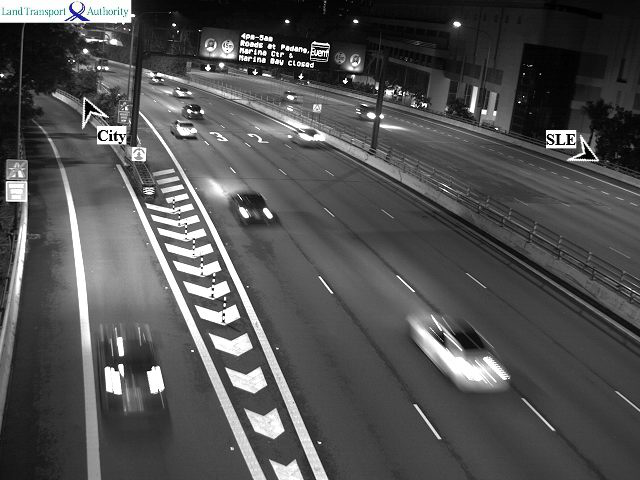

In [20]:
r = requests.get(df_2019.iloc[0]['image'])
img = Image.open(BytesIO(r.content))
img

In [45]:
def getImages(index, row, destination_path):
  row_num = index
  temp_url = row['image']
  temp_res = requests.get(temp_url, auth=('user', 'pass'))

  try:
    image = Image.open(BytesIO(temp_res.content))
    image.save(destination_path + str(row_num) + ".jpg")
  except Exception as e:
    print(e)

In [46]:
df_test = df_2019[:5]
for index, row in df_test.iterrows():
  getImages(index, row, '/content/drive/MyDrive/Colab Notebooks/Project Traffic/car_image_2019_Jan/')


In [48]:
path = '/content/drive/MyDrive/Colab Notebooks/Project Traffic/car_image_2019_Jan/'

with futures.ThreadPoolExecutor(max_workers=150) as executor:
  for index, row in df_2019.iterrows():
    executor.submit(getImages, index, row, path)

image file is truncated (99 bytes not processed)
cannot identify image file <_io.BytesIO object at 0x7ff371902770>
cannot identify image file <_io.BytesIO object at 0x7ff3707078f0>
cannot identify image file <_io.BytesIO object at 0x7ff3706c14d0>
cannot identify image file <_io.BytesIO object at 0x7ff370669ef0>
cannot identify image file <_io.BytesIO object at 0x7ff3705482f0>


In [50]:
len(os.listdir(path))

30204

In [51]:
path = '/content/drive/MyDrive/Colab Notebooks/Project Traffic/car_image_2020_Jan/'

with futures.ThreadPoolExecutor(max_workers=150) as executor:
  for index, row in df_2020.iterrows():
    executor.submit(getImages, index, row, path)

image file is truncated (71 bytes not processed)
image file is truncated (15 bytes not processed)
image file is truncated (15 bytes not processed)


In [52]:
len(os.listdir(path))

29934

In [53]:
%cd /content
!git clone https://github.com/opencv/opencv
!git clone https://github.com/opencv/opencv_contrib
!mkdir /content/build
%cd /content/build
!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules  -DBUILD_SHARED_LIBS=OFF  -DBUILD_TESTS=OFF  -DBUILD_PERF_TESTS=OFF -DBUILD_EXAMPLES=OFF -DWITH_OPENEXR=OFF -DWITH_CUDA=ON -DWITH_CUBLAS=ON -DWITH_CUDNN=ON -DOPENCV_DNN_CUDA=ON /content/opencv
!make -j8 install

/content
Cloning into 'opencv'...
remote: Enumerating objects: 310078, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 310078 (delta 108), reused 131 (delta 81), pack-reused 309882
Receiving objects: 100% (310078/310078), 497.83 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (215842/215842), done.
Checking out files: 100% (7238/7238), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 37833, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 37833 (delta 67), reused 99 (delta 52), pack-reused 37709
Receiving objects: 100% (37833/37833), 133.26 MiB | 27.09 MiB/s, done.
Resolving deltas: 100% (23526/23526), done.
Checking out files: 100% (3058/3058), done.
/content/build
-- 'Release' build type is used by default. Use CMAKE_BUILD_TYPE to specify build type (Release or Debug)
-- The CXX compiler identification is GNU 7.5.0
-- The C comp

In [54]:
import cv2
cv2.__version__

'4.6.0'

In [59]:
!mkdir  "/content/drive/My Drive/cv2_gpu"
!cp  /content/build/lib/python3/cv2.cpython-37m-x86_64-linux-gnu.so   "/content/drive/My Drive/cv2_gpu"

mkdir: cannot create directory ‘/content/drive/My Drive/cv2_gpu’: File exists


In [61]:
!cp /content/build/lib/python3/cv2.cpython-37m-x86_64-linux-gnu.so "/content/drive/MyDrive/Colab Notebooks/Project Traffic/cv2.cpython-37m-x86_64-linux-gnu.so" 